# **Modelo de Regressão para Marketing**


## 0 Importação das bibliotecas ##

In [ ]:
# Instalação das bibliotecas que vamos utilizar
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [4]:
# Analise de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

# Regressão Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 1 Análise Descritiva ##

In [1]:
# Função de importar arquivo para o colab
from google.colab import files
upload = files.upload()

Saving MKT.csv to MKT.csv


In [5]:
# Leitura da base de dados para DF
base_mkt = pd.read_csv('MKT.csv', sep = ",")

In [7]:
# Visualizando o DF
display(base_mkt)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [10]:
base_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Nosso Dataframe possui 171 linhas, 4 colunas e nenhum valor nulo

In [8]:
base_mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


### Visualização grafica dos dados ###

In [11]:
fig = px.box(base_mkt, x="youtube")
fig.update_traces(line_color="blue")

In [12]:
fig = px.box(base_mkt, x="facebook")
fig.update_traces(line_color="blue")

In [13]:
fig = px.box(base_mkt, x="newspaper")
fig.update_traces(line_color="blue")

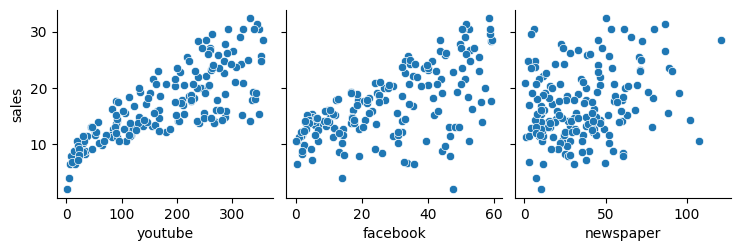

In [15]:
# Investigando qual plataforma está trazendo mais vendas
sns.pairplot(base_mkt, x_vars=['youtube', 'facebook', 'newspaper'], y_vars="sales")

<Axes: >

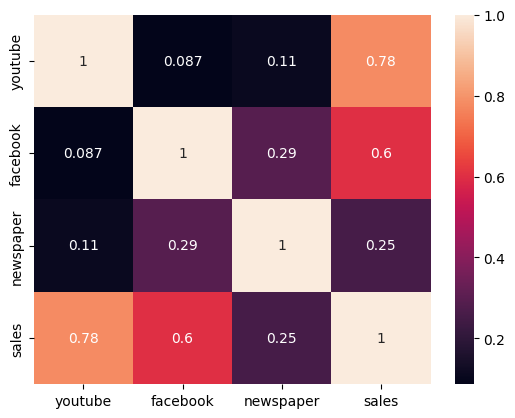

In [16]:
# Correlação das variaveis
sns.heatmap(base_mkt.corr(), annot=True)

Observando os primeiros gráficos que plotamos, deu para entender que as plataformas que mais trouxeram retorno financeiro após campanha, foram o Youtube e o Facebook

## 2 Modelo de Regressão ##

In [17]:
X = base_mkt[['youtube', 'facebook', 'newspaper']]
Y = base_mkt[['sales']]

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [20]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
y_pred = lm.predict(X_test)

In [22]:
r = r2_score(Y_test, y_pred)
print("r_quadrado:", r)

r_quadrado: 0.882423505618885


Text(0, 0.5, 'Sales')

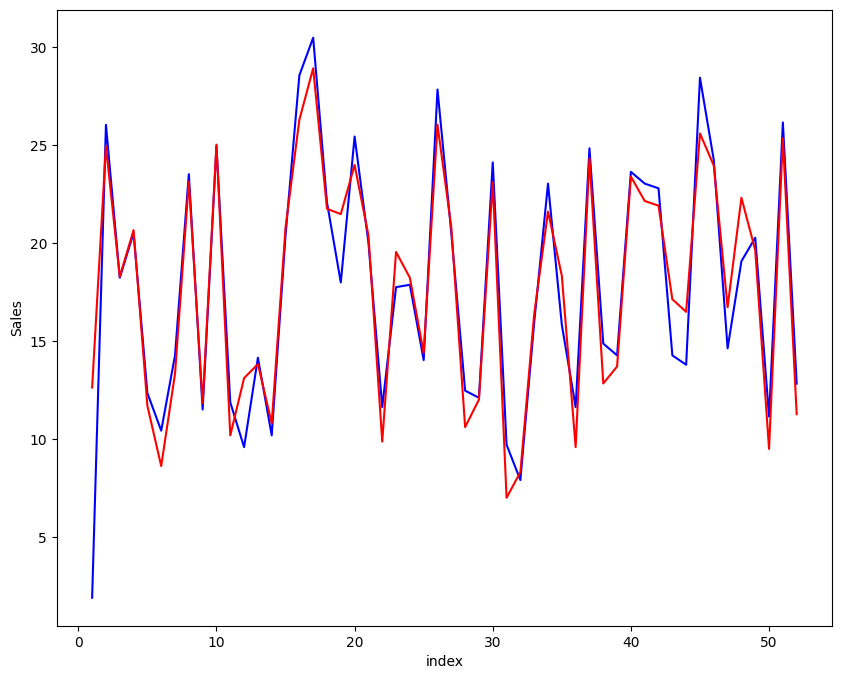

In [26]:
c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel("index")
plt.ylabel("Sales")